In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm as cm_mlib
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc, colors
from IPython.display import HTML
from brian2.units import *
import matplotlib as mlib
from scipy import stats
from pprint import pprint as pp
from mpl_toolkits.axes_grid1 import make_axes_locatable
# from simulation_statistics.analysis_functions_definitions import *
mlib.rcParams.update({'font.size': 24})
mlib.rcParams.update({'errorbar.capsize': 2})

In [14]:
from associative_memory import *

In [15]:
n_in = 20
m_in = 1000
n_out = 10
m_out = 500
seed = 9999
memory_unit = DenselyConnectedAssociativeMatrix(m_in, n_in, m_out,
                                                n_out, threshold=n_in-5,
                                                noisy_readout=2, 
                                                seed=seed)
p_gen = PatternGenerator(seed=seed)
mem_analyzer = MemoryAnalyzer(seed=seed)

In [16]:
no_patterns = 10000
in_patterns=[]
out_patterns=[]
immediate_out_patterns=[]
saturations = []

In [17]:
for pattern_id in range(no_patterns):
    temp_pattern = p_gen.generate_pattern(n=n_in, m=m_in)
    in_patterns.append(temp_pattern)
    out_patterns.append(memory_unit.store_pattern(temp_pattern))
    immediate_out_patterns.append(memory_unit.associated_patern_max_activation(temp_pattern))
    saturations.append(mem_analyzer.analyze_saturatation(memory_unit, pattern_id))

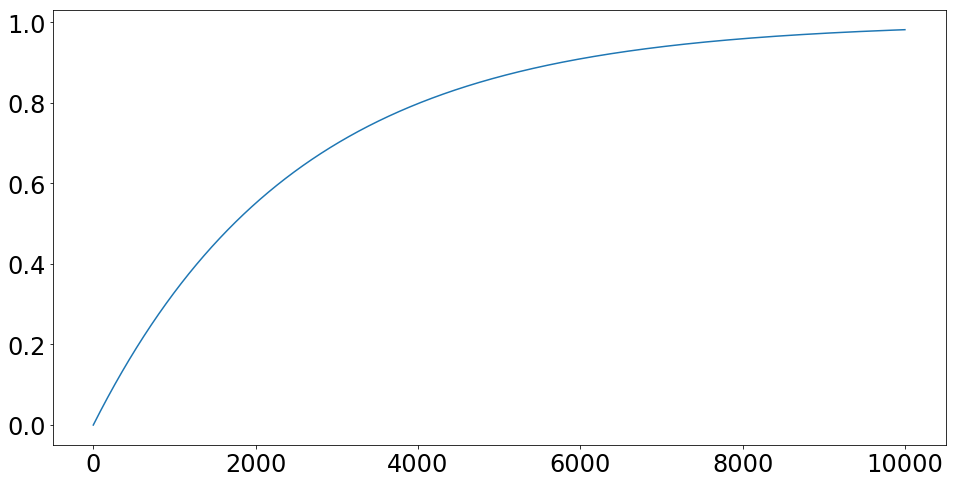

In [18]:
f = plt.figure(figsize=(16, 8))
plt.plot(saturations)
plt.show()

In [30]:
out = np.asarray(out_patterns)
iout = np.asarray(immediate_out_patterns)

dots = []
for index in range(no_patterns):
    dots.append(np.dot(out[index], iout[index]))
dots = np.asarray(dots)

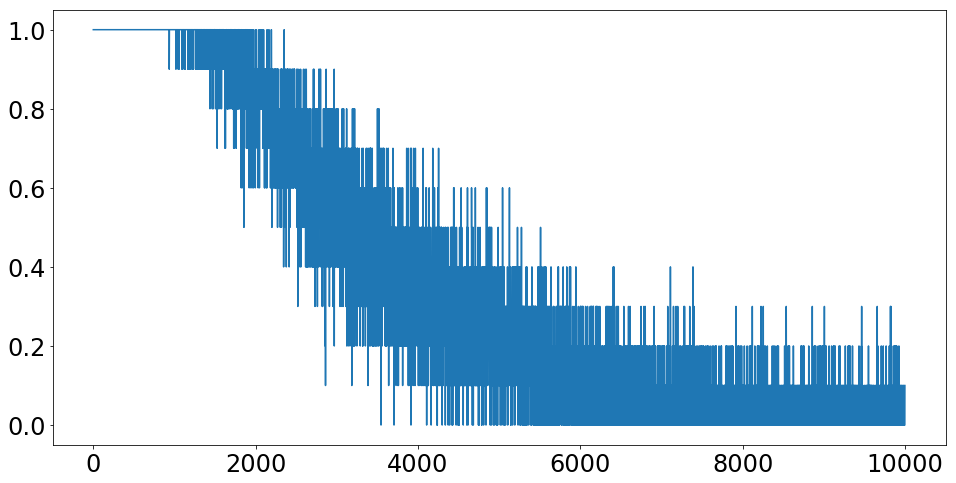

In [31]:
f = plt.figure(figsize=(16, 8))
plt.plot(dots/float(n_out))
plt.show()